In [2]:
import numpy as np 
import pandas as pd

import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial

import matplotlib.pyplot as plt
import seaborn as sbn

# Functional Principle Components Analysis 

Following [this](https://fda.readthedocs.io/en/latest/auto_examples/plot_fpca.html#sphx-glr-auto-examples-plot-fpca-py) tutorial. 


Uses the FDdata structure, [docs](https://fda.readthedocs.io/en/latest/modules/autosummary/skfda.representation.grid.FDataGrid.html)

In [3]:
dat = pd.read_csv('../data/clover_all_cell.csv')
dat.head()

,track_index,0.0,0.2,0.5,0.8,1.0,1.2,1.5,1.8,2.0,...,20.0,20.2,20.5,20.8,21.0,21.2,21.5,site,cell__treatment,median
0,87_1000221723_heya8_cdk2_mdmx__untreated,0.716859,0.613327,0.558718,0.588335,0.624356,0.586035,0.565107,0.601025,0.574367,...,0.908067,0.876621,0.992150,0.732915,0.996316,0.732172,0.914643,87,heya8_cdk2_mdmx__untreated,0.852249
1,86_1000211961_heya8_cdk2_mdmx__untreated,0.431360,0.455203,0.467835,0.434578,0.435951,0.367845,0.395783,0.386936,0.469809,...,0.718739,0.849368,1.002122,0.712759,0.943944,0.919513,0.901095,86,heya8_cdk2_mdmx__untreated,0.849368
2,87_1000222005_heya8_cdk2_mdmx__untreated,0.925348,0.867862,0.810377,0.752892,0.802330,0.791280,0.780230,0.880654,0.890546,...,0.673668,0.699035,0.717837,0.820469,0.825380,0.830841,0.900079,87,heya8_cdk2_mdmx__untreated,0.824277
3,87_1000221880_heya8_cdk2_mdmx__untreated,0.510213,0.494247,0.608308,0.703314,0.756138,0.802310,0.827721,0.802502,0.750039,...,0.717701,0.810534,0.866702,0.714824,0.845721,0.920741,0.963850,87,heya8_cdk2_mdmx__untreated,0.808875
4,2_1000007033_heya8_cdk2_mdmx__untreated,0.727552,0.677675,0.564581,0.701329,0.794484,0.754134,0.708484,0.740395,0.758439,...,0.281985,0.355581,0.382703,0.359962,0.481656,0.519449,0.495301,2,heya8_cdk2_mdmx__untreated,0.798166


In [4]:
clover = skfda.representation.grid.FDataGrid(dat[dat.columns[1:-3]].values, 
                                    grid_points=[float(x) for x in dat.columns[1:-3]],
                                    sample_points=None, 
                                    domain_range=None, 
                                    dataset_label=None, 
                                    dataset_name='clover', 
                                    argument_names=None, 
                                    coordinate_names=None, 
                                    sample_names=dat.track_index.values, 
                                    axes_labels=None, 
                                    extrapolation=None, 
                                    interpolation=None)

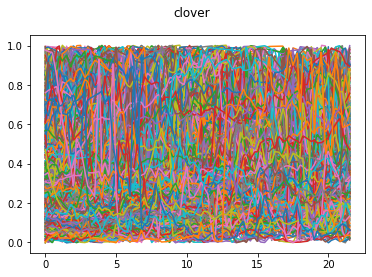

In [5]:
_ = clover.plot()

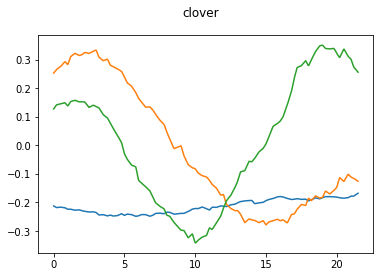

In [40]:
fpca = FPCA(n_components=3, centering=True, components_basis=Fourier(n_basis=7))
fpca.fit(clover)
_ = fpca.components_.plot()

In [41]:
fpca.explained_variance_

array([0.0014508 , 0.00029979, 0.00021089])

In [42]:
fpca.explained_variance_ratio_

array([0.5572729 , 0.11515454, 0.08100644])

## how to visualize PC plots... 

assuming sum(components*obs) = PC... 

In [44]:
res = {'PC0':[], 'PC1':[], 'PC2':[]} 
comp = fpca.components_.data_matrix.reshape((3,87))
for x in dat[dat.columns[1:-3]].values: 
    res['PC0'].append(np.sum(x * comp[0, :]))
    res['PC1'].append(np.sum(x * comp[1, :])) 
    res['PC2'].append(np.sum(x * comp[2, :])) 
    
res = pd.DataFrame(res)

In [45]:
dat2 = pd.concat((dat,res), axis=1)
dat2.head()

,track_index,0.0,0.2,0.5,0.8,1.0,1.2,1.5,1.8,2.0,...,20.8,21.0,21.2,21.5,site,cell__treatment,median,PC0,PC1,PC2
0,87_1000221723_heya8_cdk2_mdmx__untreated,0.716859,0.613327,0.558718,0.588335,0.624356,0.586035,0.565107,0.601025,0.574367,...,0.732915,0.996316,0.732172,0.914643,87,heya8_cdk2_mdmx__untreated,0.852249,-14.615994,-1.351980,0.783290
1,86_1000211961_heya8_cdk2_mdmx__untreated,0.431360,0.455203,0.467835,0.434578,0.435951,0.367845,0.395783,0.386936,0.469809,...,0.712759,0.943944,0.919513,0.901095,86,heya8_cdk2_mdmx__untreated,0.849368,-13.603097,-4.787875,0.123987
2,87_1000222005_heya8_cdk2_mdmx__untreated,0.925348,0.867862,0.810377,0.752892,0.802330,0.791280,0.780230,0.880654,0.890546,...,0.820469,0.825380,0.830841,0.900079,87,heya8_cdk2_mdmx__untreated,0.824277,-14.151785,1.270342,-0.713202
3,87_1000221880_heya8_cdk2_mdmx__untreated,0.510213,0.494247,0.608308,0.703314,0.756138,0.802310,0.827721,0.802502,0.750039,...,0.714824,0.845721,0.920741,0.963850,87,heya8_cdk2_mdmx__untreated,0.808875,-14.827678,-0.602714,0.476924
4,2_1000007033_heya8_cdk2_mdmx__untreated,0.727552,0.677675,0.564581,0.701329,0.794484,0.754134,0.708484,0.740395,0.758439,...,0.359962,0.481656,0.519449,0.495301,2,heya8_cdk2_mdmx__untreated,0.798166,-14.220317,-0.118333,-1.501179


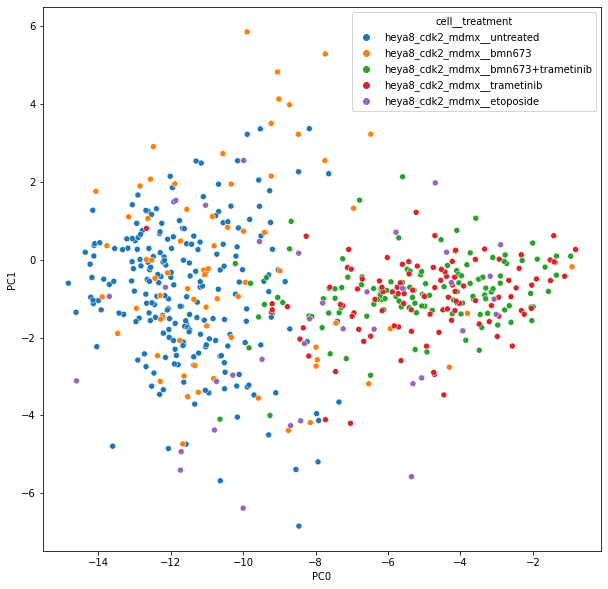

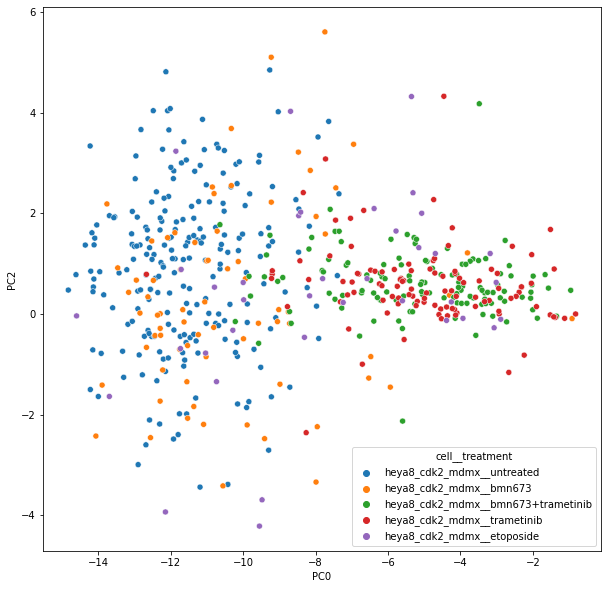

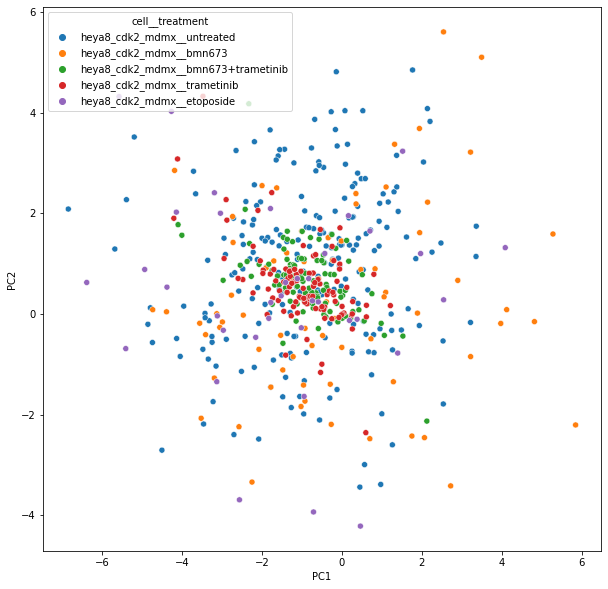

In [47]:
plt.figure(figsize=(10,10))
sbn.scatterplot(x='PC0', y='PC1', hue='cell__treatment', data=dat2)
plt.show()

plt.figure(figsize=(10,10))
sbn.scatterplot(x='PC0', y='PC2', hue='cell__treatment', data=dat2)
plt.show()

plt.figure(figsize=(10,10))
sbn.scatterplot(x='PC1', y='PC2', hue='cell__treatment', data=dat2)
plt.show()